# DataPirates_368_384_391

**DATA ANALYTICS ASSIGNMENT (UE19CS312)**

Prediction of Closing Stock Price for Waystar Royco

The aim of this assignment is to analyze the closing stock price of Waystar Royco given date, opening price, highest value, lowest value and the volume of the stock and to predict the closing stock price for a given set of inputs by developing various regression and time series models to predict the clsoing stock price given the following features

We import the necsaary libraries required for this assignment

In [1]:
import warnings
import numpy as np
import pandas as pd 
from sklearn import metrics
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima_model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Read the train.csv for analyzing and training various models

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Date,Open,High,Low,Volume,Close
0,14-08-2015,57.484790,58.398406,57.342469,171718000,58.237720
1,17-08-2015,58.274453,59.013611,58.026536,163538800,58.788651
2,18-08-2015,58.453501,58.917197,58.260678,138242800,58.485638
3,19-08-2015,58.301997,58.494820,57.650069,193146000,57.801575
4,20-08-2015,57.374601,57.498558,56.249794,274006400,56.718082


Using MathPlot lib plot a graph to check if there are any trends, seasonality or other features in the data provided

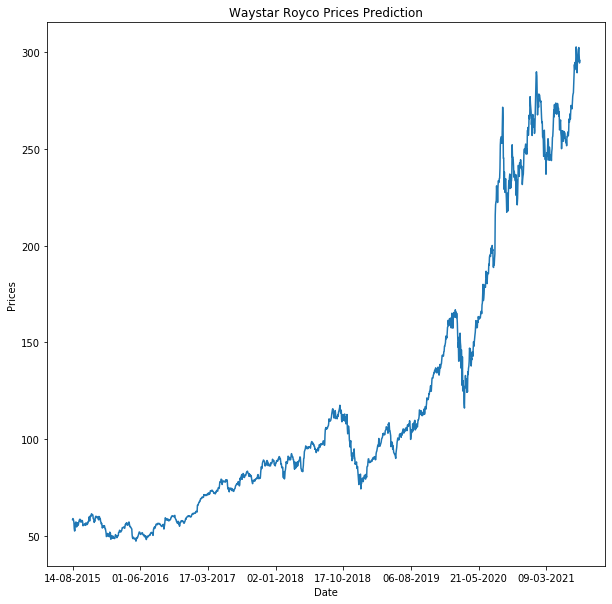

In [3]:
plt.figure(figsize=(10, 10))
plt.plot(df['Date'],df['Close'])
plt.xticks(np.arange(0,1600,200), df.Date[0:1600:200])
plt.title('Waystar Royco Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.show()

## TODO (Explain the data)

Split the data into train and test splits to evaluate and compare the various models that we will be developing for the given dataset

We have set shuffle to false and initilized the random state to obtain consistent results

In [4]:
x = df[['Open','High','Low','Volume']]
y = df['Close']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1 , shuffle=False, random_state = 0)
print(train_x.shape )
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(1350, 4)
(150, 4)
(1350,)
(150,)


# Regression Model

In [5]:
regression = LinearRegression()
regression.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Build a regression model and train it on the training dataset

In [6]:
print("regression coefficient",regression.coef_)
print("regression intercept",regression.intercept_)

regression coefficient [-5.51248185e-01  8.31565098e-01  7.18946580e-01 -1.06556731e-09]
regression intercept 0.14742146360187292


Evaluate the Linear Regression model by testing it on the testing data

In [7]:
evaluate = regression.predict(test_x)

Analyze the accuracy of the **Linear Regression Model** by calculating the Mean Squared and Root Mean Squared error 

In [8]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_y, evaluate))
print('Mean Squared Error (MSE) :', metrics.mean_squared_error(test_y, evaluate))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(test_y, evaluate)))

Mean Absolute Error (MAE): 1.2992858907868445
Mean Squared Error (MSE) : 3.083379216698961
Root Mean Squared Error (RMSE): 1.7559553572625248


# Time Series Model

For Time series Model, we will be using a ARIMA model to predict the closing stock price

In [9]:
training_data = train_y.values
evaluate_data = test_y.values
history = [x for x in training_data]

model_predictions = []
N_evaluate_observations = len(evaluate_data)

for i in range(N_evaluate_observations):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = evaluate_data[i]
    history.append(true_test_value)

## TODO (explain ARIMA model)

Analyze the accuracy of the **ARIMA Model** by calculating the Mean Squared and Root Mean Squared error 

In [10]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(evaluate_data, model_predictions))
print('Mean Squared Error (MSE) :', metrics.mean_squared_error(evaluate_data, model_predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(evaluate_data, model_predictions)))

Mean Absolute Error (MAE): 3.4513292921644596
Mean Squared Error (MSE) : 19.411588872972473
Root Mean Squared Error (RMSE): 4.405858471736521


Plot a graph to compare the the predictions of both the Linear Regression and Time-Series Model on the evaluation data 

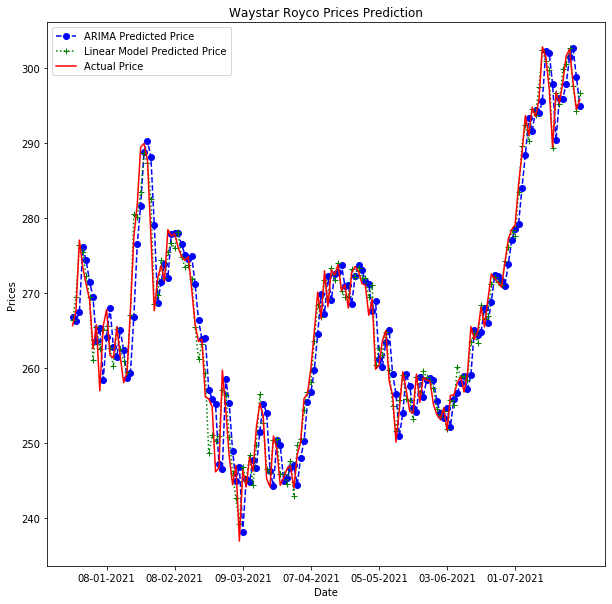

In [11]:
test_set_range = test_x.index
plt.figure(figsize=(10, 10))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='ARIMA Predicted Price')
plt.plot(test_set_range, evaluate, color='green', marker='+' , linestyle='dotted', label='Linear Model Predicted Price')
plt.plot(test_set_range, evaluate_data, color='red', label='Actual Price')
plt.title('Waystar Royco Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(1360,1500,20), df.Date[1360:1500:20])
plt.legend()
plt.show()

As we can observe from both the graph and the table, we don't observe a significant difference in the predictions or the performance of both models, but Linear Regression Model is more consistent in it's perform compared to the ARIMA model

In [12]:
model_predictions = np.dstack(model_predictions)[0][0]
dfr=pd.DataFrame({'Actual_Price':test_y, 'Linear_Regression_Price':evaluate, 'ARIMA_model_Price':model_predictions})
dfr.head(10)

,Actual_Price,Linear_Regression_Price,ARIMA_model_Price
1350,265.695129,266.411774,266.864377
1351,267.705658,269.532020,266.299664
1352,277.101532,276.399875,267.509168
1353,273.478546,275.536474,276.116468
1354,271.189301,272.292832,274.384740
1355,269.138946,269.462470,271.534129
1356,262.609650,261.060765,269.551516
1357,265.794647,265.484605,263.584099
1358,257.015915,262.631229,265.379246
1359,265.615509,265.055667,258.502520


Compare the performance of both the model **Linear Regression Model** and **ARIMA Model** by calculating the Mean Squared and Root Mean Squared error between their predictions

In [13]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(evaluate, model_predictions))
print('Mean Squared Error (MSE) :', metrics.mean_squared_error(evaluate, model_predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(evaluate, model_predictions)))

Mean Absolute Error (MAE): 3.0802787040889625
Mean Squared Error (MSE) : 15.50472450486217
Root Mean Squared Error (RMSE): 3.937603904008397


Import the test.csv provided in the dataset on which predictions have to be made, filter the dataset to only contain the required columns for predictions

In [15]:
test_df = pd.read_csv('test.csv')
test_df = test_df[['Open','High','Low','Volume']]
test_df.head()

,Open,High,Low,Volume
0,293.328006,297.222165,292.788806,70382000
1,297.282094,298.460321,295.065414,62880000
2,296.183715,300.637034,294.925590,64786600
3,299.099384,300.137807,297.122335,56368300
4,298.520228,300.237657,296.902657,46397700


Predict the closing stock price using Linear Regression Model that was already trained 

In [22]:
LR_prediction = regression.predict(test_df)
LR_prediction

array([296.03498343, 296.52966028, 298.84266091, 298.40857602,
       298.66355358, 297.79924819, 297.13007105, 298.2074721 ,
       297.34352197, 301.48466404, 302.57625083, 303.32573808,
       306.05649909, 300.712855  , 299.07486041, 300.55658398,
       304.00397742, 305.68544494, 302.43825801, 301.64619106,
       301.00467608, 309.73402574, 308.40966316, 313.36418659,
       311.88126439, 312.85919319, 317.7423718 , 314.57930136,
       314.65041284, 306.50511782])

Predict the closing stock price using ARIMA Model that was already trained 

In [48]:
"""test_data = test_df.values
ARIMA_model_predictions = []
N_test_observations = len(test_data)

for k in range(N_test_observations):
    output_1 = model_fit.forecast()
    yhat_1 = output_1[0]
    ARIMA_model_predictions.append(yhat_1)"""
training_data = df['Close'].values
#test_data = df_test['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = 30
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat[0])
    #true_test_value = test_data[time_point]
    history.append(LR_prediction[time_point])

Plot a graph to compare the the predictions of both the Linear Regression and Time-Series Model on the testing data provided

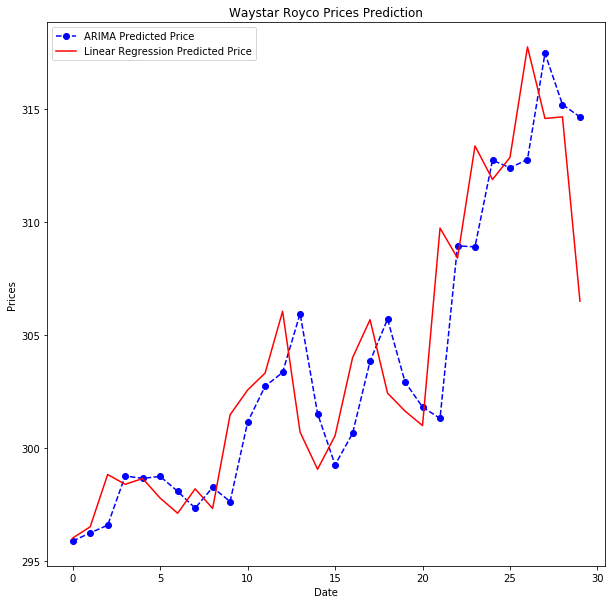

In [49]:
test_set_range = test_df.index
plt.figure(figsize=(10, 10))
#plt.plot(test_set_range, ARIMA_model_predictions, color='blue', marker='o', linestyle='dashed',label='ARIMA Predicted Price')
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='ARIMA Predicted Price')
plt.plot(test_set_range, LR_prediction, color='red', label='Linear Regression Predicted Price')
plt.title('Waystar Royco Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

## TODO (compare the predictions)

In [52]:
ARIMA_model_predictions = np.dstack(ARIMA_model_predictions)[0][0]
dfr=pd.DataFrame({'Linear_Regression_Price':LR_prediction, 'ARIMA_model_Price':model_predictions})
dfr.head(10)

,Linear_Regression_Price,ARIMA_model_Price
0,296.034983,295.898963
1,296.529660,296.261370
2,298.842661,296.602148
3,298.408576,298.776718
4,298.663554,298.671606
5,297.799248,298.757166
6,297.130071,298.099400
7,298.207472,297.354233
8,297.343522,298.269982
9,301.484664,297.646432


Compare the predictions of both the model **Linear Regression Model** and **ARIMA Model** by calculating the Mean Squared and Root Mean Squared error between their predictions

In [51]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(LR_prediction, ARIMA_model_predictions))
print('Mean Squared Error (MSE) :', metrics.mean_squared_error(LR_prediction, ARIMA_model_predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(LR_prediction, ARIMA_model_predictions)))

Mean Absolute Error (MAE): 8.946403402744751
Mean Squared Error (MSE) : 118.36097632236472
Root Mean Squared Error (RMSE): 10.879383085559802
